In [1]:
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [15]:
os.listdir("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/myData/0")

['0_10000_1577671998.6491628.png',
 '0_10001_1577671998.65016.png',
 '0_10002_1577671998.65016.png',
 '0_10003_1577671998.651159.png',
 '0_10004_1577671998.6521559.png',
 '0_10005_1577671998.6531546.png',
 '0_10006_1577671998.6541514.png',
 '0_10007_1577671998.6541514.png',
 '0_10008_1577671998.6551478.png',
 '0_10009_1577671998.656145.png',
 '0_10010_1577671998.6571581.png',
 '0_10011_1577671998.6571581.png',
 '0_10012_1577671998.658139.png',
 '0_10013_1577671998.659136.png',
 '0_10014_1577671998.659136.png',
 '0_10015_1577671998.6601334.png',
 '0_10016_1577671998.6611307.png',
 '0_10017_1577671998.6611307.png',
 '0_10018_1577671998.6621292.png',
 '0_10019_1577671998.6631255.png',
 '0_10020_1577671998.6641226.png',
 '0_10021_1577671998.6641226.png',
 '0_10022_1577671998.66512.png',
 '0_10023_1577671998.66512.png',
 '0_10024_1577671998.6661177.png',
 '0_10025_1577671998.6671147.png',
 '0_10026_1577671998.6671147.png',
 '0_10027_1577671998.6681118.png',
 '0_10028_1577671998.6691096.png'

In [16]:
Features = []
Target = []
for i in range(43):
    for j in os.listdir("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/myData" + "/" + str(i)):
        img = cv2.imread("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/myData" + "/" + str(i) +"/" + j)
        Features.append(img)
        Target.append(i)

In [17]:
 type(Features)

list

In [18]:
import numpy as np
Features = np.array(Features)
Target = np.array(Target)

In [19]:
type(Features)

numpy.ndarray

In [20]:
Features.shape

(34799, 32, 32, 3)

In [21]:
Target.shape

(34799,)

In [22]:
from sklearn.model_selection import train_test_split
Train_x, Test_x, Train_y, Test_y = train_test_split(Features,Target,test_size = 0.2)


In [23]:
Train_x.shape

(27839, 32, 32, 3)

ValueError: cannot reshape array of size 3072 into shape (32,32)

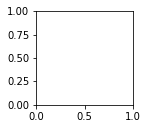

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Test_x[i].reshape(32,32))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Test_x[0].reshape(32,32))
plt.show()

In [21]:
import cv2

In [22]:
Images=[]
for i in range(len(Train_x)):
    img=cv2.cvtColor(Train_x[i],cv2.COLOR_BGR2GRAY)
    Images.append(img)

In [23]:
def preprocessing(Images):
    Images=Images/255
    return Images

In [25]:
Train_x = np.array(list(map(preprocessing, Train_x)))

In [26]:
Train_x = np.array(Images)

In [27]:
Train_x.shape

(27839, 32, 32)

In [28]:
Train_x=Train_x.reshape(27839, 32, 32,1)

In [29]:
Train_x.shape

(27839, 32, 32, 1)

In [30]:
Test_x.shape

(6960, 32, 32, 3)

In [31]:
Images=[]
for i in range(len(Test_x)):
    img=cv2.cvtColor(Test_x[i],cv2.COLOR_BGR2GRAY)
    Images.append(img)

In [32]:
def preprocessing(Images):
    Images=Images/255
    return Images

In [33]:
Test_x = np.array(list(map(preprocessing, Test_x)))

In [34]:
Test_x=np.array(Images)

In [35]:
Test_x.shape

(6960, 32, 32)

In [36]:
Test_x=Test_x.reshape(6960, 32, 32,1)

In [37]:
Train_x.shape

(27839, 32, 32, 1)

In [38]:
Test_x.shape

(6960, 32, 32, 1)

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
Train_y=to_categorical(Train_y)

In [41]:
Train_y.shape

(27839, 43)

In [42]:
Test_y=to_categorical(Test_y)

In [43]:
Test_y.shape

(6960, 43)

### Step 1: Specify the architecture

In [44]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [45]:
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(600,activation="relu"))
model.add(Dense(43,activation="softmax"))

# Step 2: Compile the Model

In [139]:
from tensorflow.keras.optimizers import Adam

In [140]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Step 3: Train the Model

In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [142]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2)

In [ ]:
model.fit_generator(dataGen.flow(Train_x,Train_y,batch_size=20),epochs=20)

Epoch 1/20
1392/1392 [==============================] - 125s 89ms/step - loss: 0.0903 - accuracy: 0.9815
Epoch 2/20
1392/1392 [==============================] - 121s 87ms/step - loss: 0.0947 - accuracy: 0.9801
Epoch 3/20
1392/1392 [==============================] - 118s 85ms/step - loss: 0.0963 - accuracy: 0.9806
Epoch 4/20
1392/1392 [==============================] - 119s 86ms/step - loss: 0.0939 - accuracy: 0.9801
Epoch 5/20
1392/1392 [==============================] - 121s 87ms/step - loss: 0.0811 - accuracy: 0.9813
Epoch 6/20
1392/1392 [==============================] - 119s 86ms/step - loss: 0.1006 - accuracy: 0.9804
Epoch 7/20
1392/1392 [==============================] - 120s 86ms/step - loss: 0.0774 - accuracy: 0.9835
Epoch 8/20
1392/1392 [==============================] - 128s 92ms/step - loss: 0.0843 - accuracy: 0.9824
Epoch 9/20
1392/1392 [==============================] - 124s 89ms/step - loss: 0.1066 - accuracy: 0.9797
Epoch 10/20
 703/1392 [==============>...............] 

In [104]:
model_json=model.to_json()

In [105]:
f=open("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/AITraff.json","w")
f.write(model_json)
f.close()

In [106]:
model.save_weights("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/AITrafficWeights.h5")

In [107]:
import cv2
from tensorflow.keras.models import model_from_json

In [108]:
json_file=open("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/AITraff.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/AITrafficWeights.h5")

In [110]:
pred = loaded_model.predict(Test_x)


In [133]:
print(pred)

[[4.39819949e-08 3.93475641e-10 1.06582975e-05 ... 6.06951156e-11
  1.91210298e-10 1.00780304e-11]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.17363804e-36 0.00000000e+00 ... 3.03406313e-35
  0.00000000e+00 0.00000000e+00]
 ...
 [1.77782970e-22 1.27416864e-22 2.60037490e-26 ... 6.25722554e-28
  2.71082020e-33 4.28003360e-28]
 [4.11936753e-22 3.88167189e-12 1.93145433e-09 ... 4.01900328e-14
  1.19668887e-22 4.59729014e-23]
 [2.12802709e-11 2.85655267e-11 7.14879933e-09 ... 6.23696372e-11
  4.44192345e-13 8.19736463e-15]]


In [127]:
a = pred[0]

In [128]:
print(a)

[4.39819949e-08 3.93475641e-10 1.06582975e-05 9.99900937e-01
 4.29396824e-10 6.11171781e-05 1.59235583e-10 2.54358015e-12
 2.20520269e-11 1.85055157e-07 2.68001695e-05 6.30923003e-09
 7.36571359e-11 8.27963476e-10 1.22782076e-10 7.25420080e-08
 2.37369524e-09 1.32405873e-13 5.76651782e-10 2.62432496e-17
 3.12518079e-15 6.63897051e-13 5.14377874e-13 7.62052842e-15
 5.73949779e-15 4.13246298e-10 1.82800819e-09 1.56691066e-12
 2.89081381e-09 1.50890862e-11 1.59758968e-12 7.73339082e-08
 4.15381878e-12 1.26336621e-08 3.70944192e-10 2.59376165e-09
 1.75397405e-11 3.29091612e-15 1.79857821e-07 4.00364603e-11
 6.06951156e-11 1.91210298e-10 1.00780304e-11]


In [129]:
print(np.amax(a))


0.99990094


In [130]:
cl=np.argmax(a, axis=-1)

In [131]:
print(cl)

3


In [127]:
print(np.argmax(predictions, axis=-1))

[3]


In [116]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)



False

In [117]:
def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'


In [118]:
import numpy as np
import cv2

In [119]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [ ]:
while True:
    message,frame=capt.read()
    image=np.array(frame)
    image=cv2.resize(image,(32,32))
    image=preprocessing(image)
    image=image.reshape(1,32,32,1)
    predictions=loaded_model.predict(image)
    classIndex=loaded_model.predict_classes(image)
    cv2.putText(frame,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(frame,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(frame,getClassName(classIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(frame,str(probabilityValue*100) + "%",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow("Model Prediction",frame)
    ReceivedValue=cv2.waitKey(1)
    if ReceivedValue==ord("s"):
        cv2.destroyAllWindows()
        break

In [123]:
image=cv2.imread("C:/Users/SASIREKHA/Desktop/Traffic_sign_det/data.png")
image=np.array(image)
image=cv2.resize(image,(32,32))
image=preprocessing(image)
image=image.reshape(1,32,32,1)
predictions=model.predict(image)
classIndex=model.predict_classes(image)

probabilityValue=np.amax(predictions)
print(predictions)
print(classIndex)
print(probabilityValue)


[[0.00318384 0.02724909 0.01597013 0.07177821 0.03689392 0.08438193
  0.01351297 0.0216626  0.05400373 0.0115045  0.01479458 0.00461614
  0.00913021 0.06987138 0.00850072 0.09025374 0.00117385 0.00633813
  0.17536777 0.00216815 0.01871557 0.00418117 0.00347474 0.00310328
  0.00809683 0.01386078 0.0344771  0.00216951 0.00781268 0.00771448
  0.00939501 0.02210635 0.04303994 0.00523957 0.00796606 0.00777499
  0.01219304 0.00171726 0.04014466 0.00474759 0.01336548 0.0025496
  0.00379866]]
[18]
0.17536777


In [138]:
print(model.evaluate(Test_x,Test_y))


218/218 [==============================] - 7s 33ms/step - loss: 0.0326 - accuracy: 0.9932
[0.0325826033949852, 0.9932471513748169]
